# 2. Regression

Pada bab sebelumnya, Anda menggunakan dataset gambar dan politik untuk memprediksi hasil biner dan multikelas. Tetapi bagaimana jika masalah Anda membutuhkan hasil yang berkelanjutan? Regresi paling cocok untuk memecahkan masalah seperti itu. Anda akan belajar tentang konsep dasar dalam regresi dan menerapkannya untuk memprediksi harapan hidup di suatu negara menggunakan data Gapminder.

## Introduction to regression

### Boston housing data

In [2]:
import pandas as pd

In [3]:
boston = pd.read_csv('datasets/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Creating feature and target arrays

In [4]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

### Predicting house value from a single feature

In [7]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [8]:
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

### Plotting house value vs. number of rooms

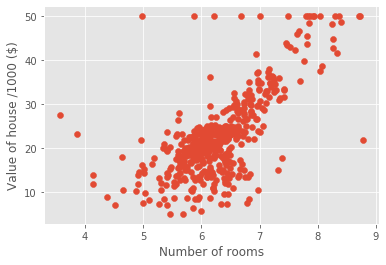

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

### Fitting a regression model

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms),
max(X_rooms)).reshape(-1, 1)

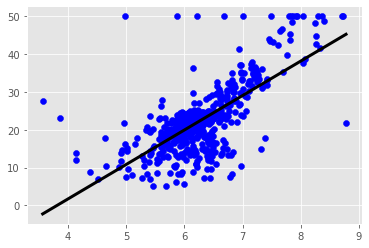

In [15]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),
         color='black', linewidth=3)
plt.show()

### Importing data for supervised learning

Dalam bab ini, Anda akan bekerja dengan data [Gapminder](https://www.gapminder.org/data/) yang telah kami konsolidasi menjadi satu file CSV yang tersedia di ruang kerja sebagai `'gapminder.csv'`. Secara khusus, tujuan Anda adalah menggunakan data ini untuk memprediksi harapan hidup di suatu negara berdasarkan fitur seperti PDB negara itu, tingkat kesuburan, dan populasi. Seperti dalam Bab 1, dataset telah pre-proses sebelumnya.

Karena variabel target di sini adalah kuantitatif, ini adalah masalah regresi. Untuk memulai, Anda akan menyesuaikan (*fit*) dengan regresi linier dengan hanya satu fitur: `'fertility'`, yang merupakan jumlah rata-rata anak yang dilahirkan oleh seorang wanita di negara tertentu. Dalam latihan selanjutnya, Anda akan menggunakan semua fitur untuk membangun model regresi.

Namun, sebelum itu, Anda perlu mengimpor data dan memasukkannya ke dalam format yang dibutuhkan oleh scikit-learn. Ini melibatkan pembuatan array fitur dan target variabel. Selain itu, karena Anda hanya akan menggunakan satu fitur untuk memulai, Anda perlu melakukan beberapa pembentukan kembali menggunakan metode `.reshape()` NumPy. Jangan terlalu khawatir tentang pembentukan kembali ini sekarang, tetapi itu adalah sesuatu yang harus Anda lakukan sesekali ketika bekerja dengan scikit-learn sehingga berguna untuk berlatih.

In [18]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/gm_2008_region.csv')

# Create arrays for features and target variable
X = df['fertility'].values
y = df['life'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


**Catatan** : Perhatikan perbedaan bentuk sebelum dan sesudah menerapkan metode `.reshape()`. Mendapatkan fitur dan array variabel target ke dalam format yang tepat untuk scikit-learn adalah hal penting untuk membangun model.

### Exploring the Gapminder data

Seperti biasa, penting untuk mengeksplorasi data Anda sebelum membangun model. Lihat grafik heatmap dibawah ini yang menunjukkan korelasi antara berbagai fitur dari dataset Gapminder. **Sel yang berwarna hijau menunjukkan korelasi positif**, sedangkan **sel yang berwarna merah menunjukkan korelasi negatif**. Luangkan waktu sejenak untuk mengeksplorasi ini: Fitur mana yang berkorelasi positif dengan `life`, dan fitur mana yang berkorelasi negatif? Apakah ini cocok dengan intuisi Anda?

Grafik dihasilkan menggunakan [fungsi heatmap Seaborn](http://seaborn.pydata.org/generated/seaborn.heatmap.html), pada baris kode berikut, di mana `df.corr()` menghitung korelasi berpasangan antara kolom:

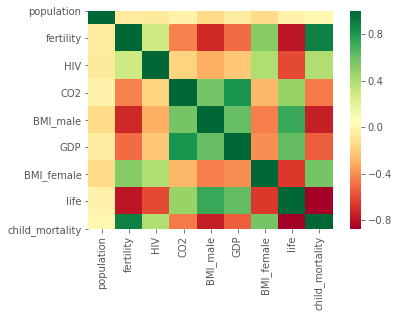

In [21]:
import seaborn as sns

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [25]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [23]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


## The basics of linear regression

### Regression mechanics

* y = ax + b
  * y = target
  * x = single feature
  * a, b = parameters of model
* How do we choose a and b?
* Define an error functions for any given line
  * Choose the line that minimizes the error function

### The loss function

Ordinary least squares(OLS): Minimalkan jumlah kuadrat residu

<img src="datasets/lost-functions.png" width=400px height=400px align=left />

### Linear regression in higher dimensions

* Agar sesuai dengan model regresi linier di sini:
  * Perlu menentukan 3 variabel
* Dalam dimensi yang lebih tinggi:
  * Harus menentukan koefisien untuk setiap fitur dan variabel b
* Scikit-learn API bekerja dengan cara yang persis sama:
  * Melalui dua array: Fitur dan target

### Linear regression on all features

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7298987360907494

### Fit & predict for regression

Sekarang, Anda akan menyesuaikan (*fit*) dengan regresi linier dan memprediksi harapan hidup menggunakan hanya satu fitur. Anda melihat Andy melakukan ini sebelumnya menggunakan fitur `'RM'` pada dataset perumahan Boston. Dalam latihan ini, Anda akan menggunakan fitur `'fertility'` dari dataset Gapminder. Karena tujuannya adalah untuk memprediksi harapan hidup (*life expectancy*), variabel target di sini adalah `'life'`. Array untuk variabel target telah dimuat sebelumnya sebagai `y` dan array untuk `'fertility'` telah dimuat sebelumnya sebagai `X_fertility`.

Scatter plot dengan `fertility` pada sumbu x dan `life` pada sumbu y telah dihasilkan. Seperti yang Anda lihat, ada korelasi yang sangat negatif, sehingga regresi linier harus dapat menangkap tren ini. Tugas Anda adalah menyesuaikan (*fit*) regresi linier dan kemudian memprediksi harapan hidup, menumpuk nilai-nilai yang diprediksi pada plot untuk menghasilkan garis regresi. Anda juga akan menghitung dan mencetak skor `R^2` menggunakan metode `.score()` sckit-learn.

In [37]:
# Create arrays for features and target variable
X_fertility = df['fertility'].values
y = df['life'].values

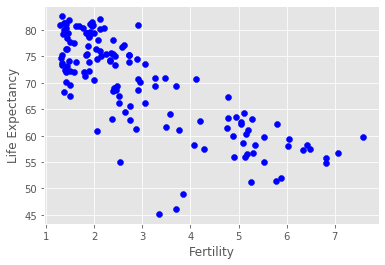

In [40]:
plt.scatter(X_fertility, y, color='blue')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

In [44]:
# Reshape X_fertility and y
X_fertility = X_fertility.reshape(-1, 1)
y = y.reshape(-1, 1)

0.6192442167740035


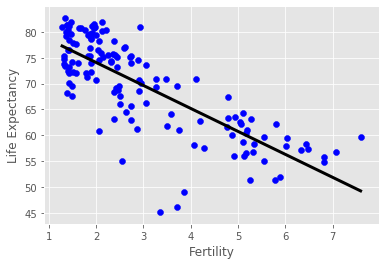

In [47]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.scatter(X_fertility, y, color='blue')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

**Catatan** : Perhatikan bagaimana garis menangkap tren yang mendasari data. Dan kinerjanya cukup baik untuk model regresi dasar ini dengan hanya satu fitur!

### Train/test split for regression

Seperti yang Anda pelajari di Bab 1, sets `train` dan `test` sangat penting untuk memastikan bahwa model pembelajaran yang diawasi Anda dapat digeneralisasikan dengan baik ke data baru. Ini berlaku untuk model klasifikasi, dan juga berlaku untuk model regresi linier.

Dalam latihan ini, Anda akan membagi dataset Gapminder menjadi set *training* dan *testing*, kemudian *fit* dan memprediksi regresi linier pada **semua fitur**. Selain menghitung skor `Rˆ2`, Anda juga akan menghitung *Root Mean Squared Error (RMSE)*, yang merupakan metrik lain yang umum digunakan untuk mengevaluasi model regresi.

In [53]:
# Create feature
X = df[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality']].values
y = df['life'].values

In [55]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.838046873142936
Root Mean Squared Error: 3.2476010800377213


**Catatan** : Menggunakan semua fitur telah meningkatkan skor model. Ini masuk akal, karena model memiliki lebih banyak informasi untuk dipelajari. Namun, ada satu jebakan potensial untuk proses ini. Bisakah Anda menemukannya? Anda akan belajar tentang ini juga bagaimana memvalidasi model Anda dengan lebih baik di tahap berikutnya!

## Cross-validation

### Cross-validation motivation

* Kinerja model tergantung pada cara data di split
* Tidak mewakili kemampuan model untuk menggeneralisasi
* Solusi: Cross-validation!

### Cross-validation basics

<img src="datasets/cross-val.png" width=500px height=500px align=left />

### Cross-validation and model performance

* 5 folds = 5-fold CV
* 10 folds = 10-fold CV
* k folds = k-fold CV
* Lebih banyak folds = Lebih mahal secara komputasi

### Cross-validation in scikit-learn

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


In [57]:
np.mean(cv_results)

0.8599627722793232

### 5-fold cross-validation

Cross-validation atau validasi silang adalah langkah vital dalam mengevaluasi suatu model. Ini memaksimalkan jumlah data yang digunakan untuk melatih model, karena selama pelatihan, model tidak hanya dilatih, tetapi juga diuji pada semua data yang tersedia.

Dalam latihan ini, Anda akan berlatih **5-fold cross validation** pada data Gapminder. Secara default, fungsi `cross_val_score()` scikit-learn menggunakan `Rˆ2` sebagai metrik pilihan untuk regresi. Karena Anda melakukan validasi silang 5 kali lipat, fungsi akan mengembalikan 5 skor. Tugas Anda adalah menghitung 5 skor ini dan kemudian mengambil rata-rata mereka.

In [60]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793232


**Note** : Sekarang Anda telah memvalidasi silang model Anda, Anda dapat lebih percaya diri mengevaluasi prediksi.

### K-Fold CV comparison

Cross validation sangat penting tetapi jangan lupa bahwa semakin banyak *folds* yang Anda gunakan, cross-validation menjadi lebih mahal secara komputasi. Dalam latihan ini, Anda akan menjelajahi ini sendiri. Tugas Anda adalah melakukan 3-fold cross-validation dan kemudian 10-fold cross-validation pada dataset Gapminder.

Dalam IPython Shell, Anda dapat menggunakan `%timeit` untuk melihat berapa lama masing-masing CV 3 kali lipat dibandingkan dengan CV 10 kali lipat dengan mengeksekusi `cv=3` dan `cv=10`:

```python
%timeit cross_val_score(reg, X, y, cv = ____)
```

In [61]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

0.8718712782622108
0.8436128620131201


In [62]:
%timeit cross_val_score(reg, X, y, cv = 3)

3.9 ms ± 39.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [63]:
%timeit cross_val_score(reg, X, y, cv = 10)

12.1 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Regularized regression

### Why regularize?

* Recall: Linear regression meminimalkan loss function
* Ia memilih koefisien untuk setiap variabel fitur
* Koefisien besar dapat menyebabkan overtting
* Menghukum koefisien besar: Regularisasi

### Ridge regression

<img src="datasets/loss-function.png" width=400px height=400px align=left />

* Alpha: Parameter yang perlu kita pilih
* Memilih alpha di sini mirip dengan memilih `k` di k-NN
* Hyperparameter tuning (Lainnya di bab 3)
* Alpha mengontrol kompleksitas model
* Alpha = 0: Kami kembali OLS (Dapat menyebabkan *overtting*)
* Alpha yang sangat tinggi: Dapat menyebabkan *underfitting*

### Ridge regression in scikit-learn

In [64]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.8442469959975754

### Lasso regression in scikit-learn

In [65]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.872129616961354

### Lasso regression for feature selection

* Dapat digunakan untuk memilih fitur-fitur penting dari dataset
* Kecilkan koefisien dari fitur penting hingga tepat 0

### Lasso for feature selection in scikit-learn

```python
from sklearn.linear_model import Lasso

names = boston.drop('MEDV', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')

plt.show()
```

### Regularization I: Lasso

Dalam video, Anda melihat bagaimana **Lasso** memilih fitur `'RM'` sebagai yang paling penting untuk memprediksi harga rumah Boston, sementara menyusutkan koefisien fitur tertentu lainnya ke 0. Kemampuannya untuk melakukan pemilihan fitur dengan cara ini menjadi lebih berguna ketika Anda berhadapan dengan data yang melibatkan ribuan fitur.

Dalam latihan ini, Anda akan menyesuaikan (*fit*) *lasso regression* dengan data Gapminder yang telah Anda kerjakan dan plot koefisiennya. Seperti halnya data Boston, Anda akan menemukan bahwa koefisien dari beberapa fitur menyusut ke 0, dengan hanya yang paling penting yang tersisa.

In [89]:
df2 = df[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality']]

In [90]:
df_columns = df2.columns
df_columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')

In [91]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


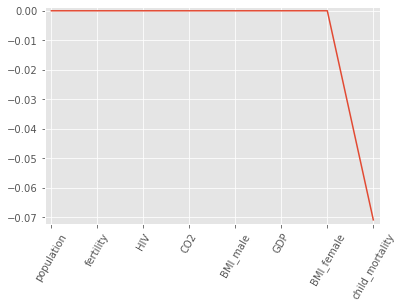

In [92]:
# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

**Catatan** : Menurut algoritma lasso, sepertinya `'child_mortality'` adalah fitur yang paling penting ketika memprediksi harapan hidup.

### Regularization II: Ridge

Lasso bagus untuk pemilihan fitur, tetapi ketika membangun model regresi, regresi Ridge harus menjadi pilihan pertama Anda. Recall dengan lasso melakukan regularisasi dengan menambah *loss function*, suatu istilah penalti dari nilai absolut dari masing-masing koefisien dikalikan dengan beberapa alpha. Ini juga dikenal sebagai regularisasi **L1** karena istilah regularisasi adalah norma **L1** dari koefisien. Namun, ini bukan satu-satunya cara untuk mengatur.

Jika sebaliknya Anda mengambil jumlah nilai kuadrat dari koefisien yang dikalikan dengan beberapa alpha - seperti dalam regresi Ridge - Anda akan menghitung norma **L2**. Dalam latihan ini, Anda akan mempraktikkan fitting model regresi ridge pada rentang berbagai alpha yang berbeda, dan plot skor **Rˆ2** yang divalidasi silang untuk masing-masing, menggunakan fungsi ini yang telah kami tentukan untuk Anda, untuk memplot skor **R^2** serta kesalahan standar untuk masing-masing alpha:

In [94]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

Jangan khawatir dengan spesifik fungsi di atas. Motivasi di balik latihan ini adalah bagi Anda untuk melihat bagaimana skor **R^2** bervariasi dengan berbagai alpha, dan untuk memahami pentingnya memilih nilai yang tepat untuk alpha. Anda akan belajar cara mengatur alpha di bab berikutnya.

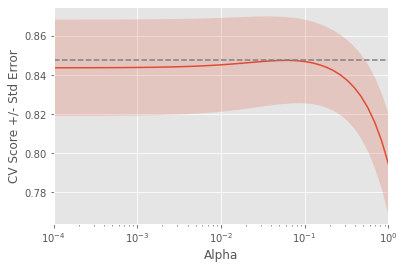

In [95]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(True, normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = 10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

**Catatan** : Perhatikan bagaimana skor validasi silang berubah dengan alpha yang berbeda. Alpha mana yang harus Anda pilih? Bagaimana Anda bisa menyempurnakan model Anda? Anda akan mempelajari semua ini di bab selanjutnya!